<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tipos de errores.

Errores en la computación, ver libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)
:


>- ### Blunder or bad theory
Errores tipográficos de entrada, errores en los datos, razonamientos teoricos malos, entre otros.
>- ### Errores aleatorios.
Impresiones causadas por eventos tales como fluctuaciones electronicas, rayos cósmicos. Se presentan rara vez, y y tiene una mayor probabilidad de ocurrir cuando los calculos se demoran del orden de semanas.
>- ### Errores de aproximación:
Se presentan por truncamiento de los modelos numéricos, por ejemplol si consideramos la serie asociada a la función
$\sin x$:

\begin{equation}
\sin x = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!}
\end{equation}


\begin{equation}
\sin x = \sum_{n=1}^{N} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} + \varepsilon(x, N)
\end{equation}


> El error numérico  en el calculo computacional es del orden de  $\varepsilon(x, N)$, dado que el computador debe truncar la serie en un N determinado.


>- ### Errores de redondeo:
Análogos a los errores  de  cantidad experimentales.


# Errores de redondeo:
## Cancelacion substractiva

Sea $b_c = b (1+ \epsilon)$ y Sea $c_c = c (1+ \epsilon)$ La representacion de dos números en el computador.  Calculemos la diferencia entre estos dos números:


$a_c = (b-c) + b\epsilon_b -c\epsilon_c = a+ b\epsilon_b -c\epsilon_c$

$\frac{a_c}{a} = 1 + \frac{b}{a}\epsilon_b -\frac{c}{a}\epsilon_c $

$\frac{a_c}{a} = 1 + \frac{b}{a} \max(\epsilon_b,\epsilon_c) $

Si $b\approx c$, el valor de a es un valor muy grande.





In [ ]:
import numpy as np

In [ ]:
print(np.float32(12.123452) - np.float32(12.123450))
diff = np.float32(12.123452) - np.float32(12.123450)
valor_real = 0.000002

error = abs(diff-valor_real)/valor_real*100

print(error)

#(12.123452/valor_real)*1/(2**31)

1.9073486e-06
4.632568359374996


In [ ]:
print(np.float32(1234567895) - np.float32(1234567890))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

0.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [ ]:
print(np.float32(12345675) - np.float32(12345671))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

4.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [ ]:
xt = 12345678912.345678
yt = 12345678912.345677
xt-yt

1.9073486328125e-06

In [ ]:
xt = 0.0000000000000005
yt = 0.0000000000000006
xt-yt

-9.999999999999995e-17

In [ ]:
a = np.float16(1.2345678912345678912)-np.float16(1.2345678900000000000)
r = 0.0000000012345678912
print(r)

1.2345678912e-09


## Errores de acumulación
$\epsilon_{ro}=\sqrt{N}\epsilon_m$


In [ ]:
#Con numeros de 32 bit.
eps = np. float64(0)

N = 1000000
for i in range(0, N):
 eps = np.float32(0.1) + eps

exac = N*0.1
error = np.abs(exac-eps) / exac
print("Valor a través de la suma: ", eps)
print("Valor exacto: ",  exac)
print("Error ", error*100 )


Valor a través de la suma:  100000.00149011612
Valor exacto:  100000.0
Error  1.4901161193847656e-06



## Errores de aproximación.
 $\epsilon_{aprox}=\frac{\alpha}{N^{\beta}}$


## Error total:
 $\epsilon_{aprox} = \epsilon_{ro}+\epsilon_{aprox}$



# Errores de una serie

- ¿Converge la serie?
- ¿Qué tan preciso es la convergencia?
- Costo computacional


## Error de una serie
Sea $x$ el valor verdadero y $x^*$ el valor aproximado

- Error absoluto : se define como
\begin{equation*}
\epsilon_{abs}= |x-x^*|
\end{equation*}
- Error relativo : es dado por
\begin{equation*}
\epsilon_{rel}= \frac{|x-x^*|}{|x|}
\end{equation*}
- Error en series : El error para truncar una serie se toma como
\begin{equation*}
\epsilon_{aprox}= \left|\frac{nth\hbox{-term}}{\hbox{suma}}\right|< \hbox{eps}
\end{equation*}
La tolerancia normalmente se toma como un número pequeño, por ejemplo `eps` $=10^{-10}$. Note que no se trunca la serie usando $|{nth}\hbox{-term}|<$ eps,   usar esta forma puede conducir a errores debido a que no se compara con el valor de la suma (un millon compardo a uno es grande, pero comparado a diez mil millones es pequeño).

Tomemos como ejemplo otra vez el cálculo de la serie del seno,


# Laboratorio

## 1. Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.

## 2. Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




**1. Exponencial, serie alternante (serieEn)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

x = 10
N = 100

def exponencial(x, N):
  exp = 0
  for i in range(N):
    exp += (-1)**i * x**i/factorial(i)
  return exp


In [ ]:
x = 10
N = 100
el = exponencial(x, N)
e_exacto = np.exp(-x)

print(f'{el}')
print(f'{e_exacto}')

4.5399929433607724e-05
4.5399929762484854e-05


In [ ]:
def exponencial_truncado(x,N):
  ex = exponencial(x,N)
  tresh = abs(1e-7*ex)
  exp_ = 0
  for i in range(N):
    exp_= abs((-x)**(i+1)/factorial(i+1))
    if exp_ <= tresh:
      break
  return exp_, i

In [ ]:

print(f'Valor de la serie:          {exponencial(x, N)}')
print(f'Valor de la serie truncada: {exponencial_truncado(x, N)}')
print(f'Valor exacto:               {e_exacto}')

Valor de la serie:          4.5399929433607724e-05
Valor de la serie truncada: (1.817315401561479e-12, 45)
Valor exacto:               4.5399929762484854e-05


para terminos positivos

In [ ]:
def invertida(x, N):
  exp  = 0
  for i in range(N):
    exp += x**i/factorial(i)
  return 1/exp

print(f'Valor de la serie:          {exponencial(x, N)}')
print(f'Valor de la serie invertida: {invertida(x, N)}')
print(f'Valor exacto:               {e_exacto}')

Valor de la serie:          4.5399929433607724e-05
Valor de la serie invertida: 4.539992976248486e-05
Valor exacto:               4.5399929762484854e-05


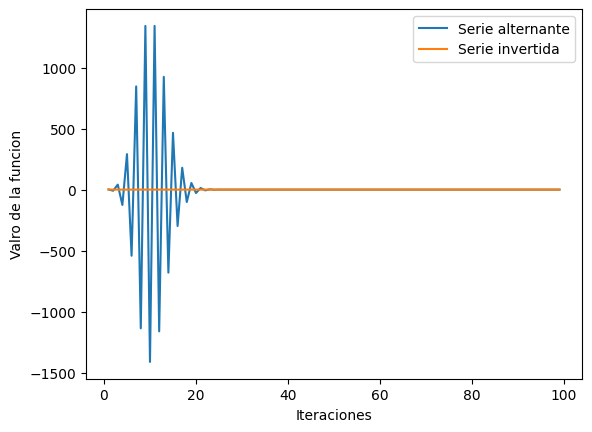

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

N  = np.arange(1, 100, 1)

exp1_ = np.zeros(len(N))
exp2_ = np.zeros(len(N))

#La función enumerate recibe un objeto iterable y retorna tuplas en las que cada una contiene un elemento del objeto que recibe

for i,n in enumerate(N):
  exp1_[i] =  exponencial(x,n)
  exp2_[i] =  invertida(x,n)

plt.figure()
plt.plot(N, exp1_, label = "Serie alternante")
plt.plot(N, exp2_, label = "Serie invertida")
plt.xlabel("Iteraciones")
plt.ylabel("Valro de la funcion")
plt.legend()
plt.show()

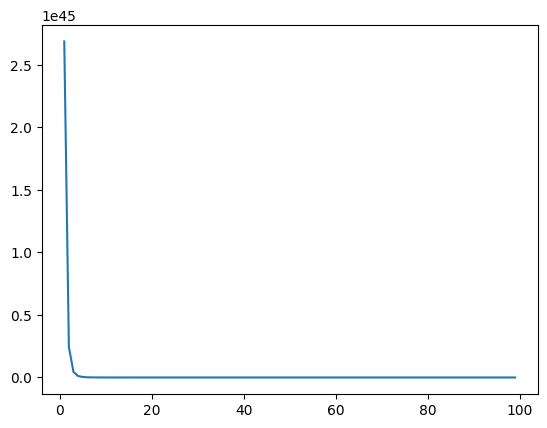

In [ ]:
x =100
N = np.arange(1, 100, 1)

exacto = np.exp(-x)
error = abs(exp2_-exacto)/exacto*100

plt.plot(N, error)

## Cancelación sustractiva

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def S1(N):
  S1 = 0
  for i in range(1,2*N +1):
    S1 = S1 + (-1)**i * i/(i+1)
  return S1

print(S1(100))

N = np.arange(1,2*100,1)

s1_ = np.zeros(len(N))

for j in range(len(N)):
  s1_[j] = S1(N[j])


"""plt.plot(N, s1_)
plt.xlabel('ITERACIONES')
plt.ylabel('VALOR SERIE 1')
plt.grid()
plt.show()"""

0.30437144514006564


"plt.plot(N, s1_)\nplt.xlabel('ITERACIONES')\nplt.ylabel('VALOR SERIE 1')\nplt.grid()\nplt.show()"

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def S2(N):
  S2 = 0
  for i in range(1, N+1):
    S2 = S2 - ((2*i-1)/(2*i)) + ((2*i)/(2*i +1))
  return S2

print(S2(100))

N = np.arange(1, 100, 1) # creo un arreglo de 1 has 100 de paso de 1

s2_ = np.zeros(len(N)) # otro array de diemnciones de N

for j, n in enumerate(N):
  s2_[j] = S2(n) # voy creando tuplas dado cada j asociado a el valor de S2

"""plt.plot(N, s2_, color = 'green')
plt.xlabel('Numeros de iteriaciones')
plt.ylabel('VALOR DE LA SERIE')
plt.grid()
plt.show( )"""

0.30437144514006564


"plt.plot(N, s2_, color = 'green')\nplt.xlabel('Numeros de iteriaciones')\nplt.ylabel('VALOR DE LA SERIE')\nplt.grid()\nplt.show( )"

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def S3(N):
  S3 = 0
  for i in range(1, N+1):
    S3 = S3 + 1 / (2*i*((2*i)+1))
  return S3

print(S3(100))

N = np.arange(1,100,1)

s3_ = np.zeros(len(N))

for j, n in enumerate(N):
  s3_[j] = S3(n)


#plt.plot(N, s3_, color = 'purple')
#plt.xlabel('VALRO DE S3')
#plt.ylabel('NUMEROD DE ITERACONES')
#plt.grid()
#plt.show()

0.3043714451400664



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

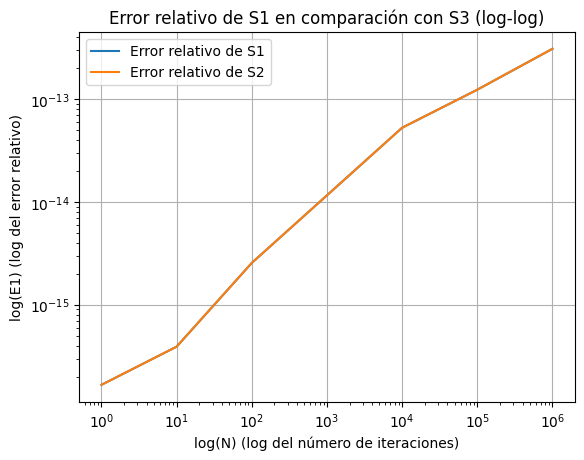

In [50]:
import matplotlib.pyplot as plt

def S1(N):
    S1 = 0
    for i in range(1, 2*N + 1):
        S1 = S1 + (-1)**i * i/(i+1)
    return S1

def S3(N): # exacta
    S3 = 0
    for i in range(1, N+1):
        S3 = S3 + 1 / (2*i*((2*i)+1))
    return S3

def E1(N):
    err1 = abs((S1(N) - S3(N)) / S3(N))
    return err1

def E2(N):
    err2 = abs((S2(N) - S3(N)) / S3(N))
    return err2

N_values = [10**n for n in range(0, 7)]

# Calcula los errores solo para los valores de N definidos
errors1 = [E1(N) for N in N_values]
errors2 = [E2(N) for N in N_values]

plt.loglog(N_values, errors1, label='Error relativo de S1')
plt.loglog(N_values, errors2, label='Error relativo de S2')
plt.xlabel('log(N) (log del número de iteraciones)')
plt.ylabel('log(E1) (log del error relativo)')
plt.title('Error relativo de S1 en comparación con S3 (log-log)')
plt.legend()
plt.grid(True)
plt.show()
